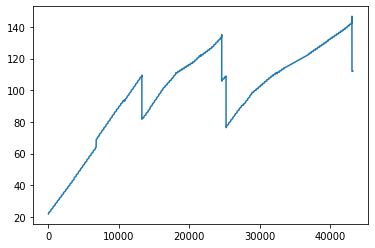

In [1]:
import pandas
import matplotlib.pyplot as plt
usecol = ["Disk_Usage_MB", "Ref_Date_Time"]
dataset = pandas.read_csv('cassandra_zstd_compressd.csv', usecols=usecol, engine='python')
dataset = dataset.set_index("Ref_Date_Time")
#dataset.head(7)
plt.plot(dataset)
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
dataframe = pandas.read_csv('cassandra_zstd_compressd.csv')
dataframe

,Date_time,CPU,Memory_Bytes,Disk_Usage,Ref_Date_Time,Disk_Usage_MB
0,1629279570,1.750000e+13,2494689280,21896,0,21.896
1,1629279571,1.750000e+13,2438774784,21900,1,21.900
2,1629279572,1.750000e+13,2511945728,21904,2,21.904
3,1629279573,1.750000e+13,2438729728,21908,3,21.908
4,1629279574,1.750000e+13,2438975488,21912,4,21.912
...,...,...,...,...,...,...
29394,1629322736,3.500000e+13,2542534656,112104,43166,112.104
29395,1629322739,3.500000e+13,2542559232,112104,43169,112.104
29396,1629322740,3.500000e+13,2542592000,112108,43170,112.108
29397,1629322742,3.500000e+13,2542288896,112108,43172,112.108


In [5]:
data = dataframe.filter(['Disk_Usage_MB'])
# convert the data frame to numpy array
dataset = data.values

training_data_len = math.ceil(len(dataset) * .7)
training_data_len

20580

In [6]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [3.20410125e-05],
       [6.40820250e-05],
       ...,
       [7.22620955e-01],
       [7.22620955e-01],
       [7.22652996e-01]])

In [7]:
# create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# split the data into x_train and y_train
x_train= []
y_train=[]

for i in range (30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 31:
        print(x_train)
        print(y_train)

[array([0.00000000e+00, 3.20410125e-05, 6.40820250e-05, 9.61230375e-05,
       1.28164050e-04, 1.60205062e-04, 1.92246075e-04, 2.24287087e-04,
       2.56328100e-04, 2.88369112e-04, 3.20410125e-04, 3.84492150e-04,
       4.16533162e-04, 4.48574175e-04, 4.80615187e-04, 5.12656200e-04,
       5.44697212e-04, 5.76738225e-04, 6.08779237e-04, 6.40820250e-04,
       6.72861262e-04, 7.04902275e-04, 7.36943287e-04, 7.68984300e-04,
       8.01025312e-04, 8.33066325e-04, 8.65107337e-04, 9.29189362e-04,
       9.61230375e-04, 9.93271387e-04])]
[0.0010253123998718305]
[array([0.00000000e+00, 3.20410125e-05, 6.40820250e-05, 9.61230375e-05,
       1.28164050e-04, 1.60205062e-04, 1.92246075e-04, 2.24287087e-04,
       2.56328100e-04, 2.88369112e-04, 3.20410125e-04, 3.84492150e-04,
       4.16533162e-04, 4.48574175e-04, 4.80615187e-04, 5.12656200e-04,
       5.44697212e-04, 5.76738225e-04, 6.08779237e-04, 6.40820250e-04,
       6.72861262e-04, 7.04902275e-04, 7.36943287e-04, 7.68984300e-04,
       8.0

In [8]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(20550, 30, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
20550/20550 [==============================] - 221s 11ms/step - loss: 2.4628e-04
Epoch 2/25
20550/20550 [==============================] - 293s 14ms/step - loss: 5.5975e-05
Epoch 3/25
20550/20550 [==============================] - 289s 14ms/step - loss: 4.6686e-05
Epoch 4/25
20550/20550 [==============================] - 292s 14ms/step - loss: 3.7524e-05
Epoch 5/25
20550/20550 [==============================] - 293s 14ms/step - loss: 3.3075e-05
Epoch 6/25
20550/20550 [==============================] - 292s 14ms/step - loss: 2.9598e-05
Epoch 7/25
20550/20550 [==============================] - 293s 14ms/step - loss: 2.7181e-05
Epoch 8/25
20550/20550 [==============================] - 298s 14ms/step - loss: 2.8717e-05
Epoch 9/25
20550/20550 [==============================] - 300s 15ms/step - loss: 2.5866e-05
Epoch 10/25
20550/20550 [==============================] - 295s 14ms/step - loss: 2.4649e-05
Epoch 11/25
20550/20550 [==============================] - 295s 14ms/step - los

In [13]:
# create the testing dataset
# array from 10500 to 15042
test_data = scaled_data[training_data_len - 30: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [14]:
# convert data to numpy array
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
# get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
# get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.002503077717997516

C:\Users\anush\AppData\Local\Temp/ipykernel_18704/37085224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


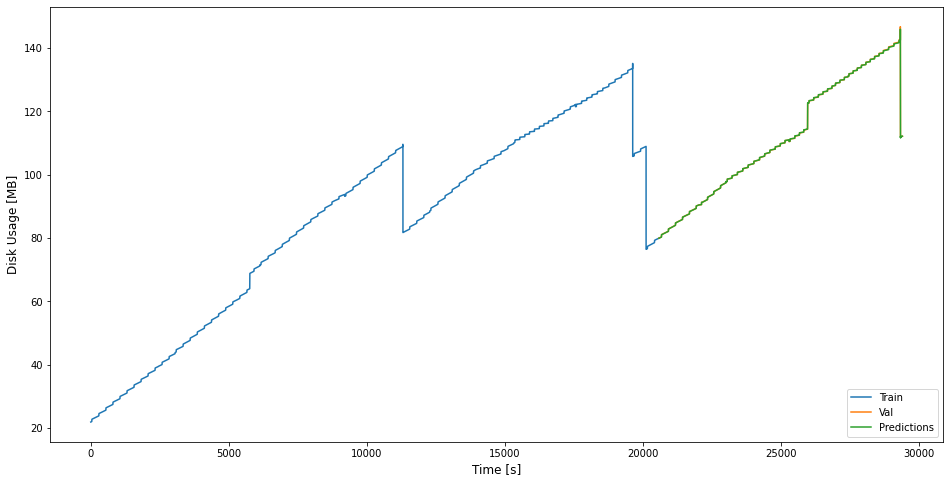

In [18]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize
plt.figure(figsize=(16,8))
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Disk Usage [MB]', fontsize=12)
plt.plot(train['Disk_Usage_MB'])
plt.plot(valid[['Disk_Usage_MB', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [31]:
valid
import csv

with open(r'cassandra_non_linear_lstm_disk_space.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['timeslot', 'rl_storage_allocation', 'downtime'])

In [32]:
# Get the data
new_df = dataframe.filter(['Disk_Usage_MB'])
new_dataset = new_df.values
length_new_dataset = len(new_dataset)
downtime = 0
previous_value = 0
print(length_new_dataset)
for i in range(30, length_new_dataset):
    last_30_days = new_df[i-30:i].values
    last_30_days_scaled = scaler.transform(last_30_days)
    # create an empty list
    X_test = []
    X_test.append(last_30_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # get the predicted scaled value
    pred_disk_usage = model.predict(X_test)
    # undo scaling
    pred_disk_usage = scaler.inverse_transform(pred_disk_usage)
    difference = pred_disk_usage.item() - previous_value
    
    if difference == 0:
        pass
    elif difference > 0:
        downtime += 1
    else:
        if difference < -10:
            downtime += 40
        else:
            pass
    with open(r'cassandra_non_linear_lstm_disk_space.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow([i, pred_disk_usage, downtime])
    print(pred_disk_usage)
    
    previous_value = pred_disk_usage.item()
    
#last_30_days

29399
[[22.0403]]
[[22.044338]]
[[22.048326]]
[[22.052296]]
[[22.05626]]
[[22.060205]]
[[22.064154]]
[[22.068098]]
[[22.758135]]
[[22.709717]]
[[22.755928]]
[[22.773508]]
[[22.785715]]
[[22.792368]]
[[22.797081]]
[[22.800947]]
[[22.804552]]
[[22.808128]]
[[22.811773]]
[[22.819365]]
[[22.82286]]
[[22.826946]]
[[22.830893]]
[[22.834856]]
[[22.838793]]
[[22.842735]]
[[22.846668]]
[[22.850624]]
[[22.85457]]
[[22.858519]]
[[22.862467]]
[[22.86641]]
[[22.870365]]
[[22.874308]]
[[22.878275]]
[[22.886099]]
[[22.889755]]
[[22.89395]]
[[22.897978]]
[[22.90197]]
[[22.905945]]
[[22.909899]]
[[22.913855]]
[[22.917812]]
[[22.92176]]
[[22.925718]]
[[22.92967]]
[[22.933613]]
[[22.937576]]
[[22.941519]]
[[22.949358]]
[[22.95302]]
[[22.957216]]
[[22.961246]]
[[22.965252]]
[[22.969215]]
[[22.973166]]
[[22.977133]]
[[22.98108]]
[[22.985039]]
[[22.989]]
[[22.996824]]
[[23.000494]]
[[23.004675]]
[[23.008717]]
[[23.012712]]
[[23.01667]]
[[23.020636]]
[[23.024591]]
[[23.028532]]
[[23.032486]]
[[23.036438]]
[[

[[26.669735]]
[[26.673702]]
[[26.677671]]
[[26.68163]]
[[26.685604]]
[[26.68957]]
[[26.693542]]
[[26.701448]]
[[26.705126]]
[[26.70931]]
[[26.713346]]
[[26.71735]]
[[26.721325]]
[[26.72531]]
[[26.729275]]
[[26.733248]]
[[26.737211]]
[[26.741169]]
[[26.745144]]
[[26.753054]]
[[26.75671]]
[[26.760899]]
[[26.764948]]
[[26.768955]]
[[26.77294]]
[[26.776901]]
[[26.780874]]
[[26.784842]]
[[26.788803]]
[[26.792768]]
[[26.80068]]
[[26.804352]]
[[26.808537]]
[[26.812578]]
[[26.81658]]
[[26.82057]]
[[26.824532]]
[[26.828505]]
[[26.832468]]
[[26.836437]]
[[26.840406]]
[[26.844381]]
[[26.852291]]
[[26.855963]]
[[26.860136]]
[[26.86419]]
[[26.868193]]
[[26.87218]]
[[26.876146]]
[[26.880112]]
[[26.884083]]
[[26.888044]]
[[26.892008]]
[[26.89598]]
[[26.90389]]
[[26.907562]]
[[26.911749]]
[[26.915789]]
[[26.9198]]
[[26.923784]]
[[26.927757]]
[[26.931719]]
[[26.935682]]
[[26.939648]]
[[26.943624]]
[[26.951536]]
[[26.9552]]
[[26.959393]]
[[26.963427]]
[[26.967436]]
[[26.97143]]
[[26.975395]]
[[26.979357

[[30.645067]]
[[30.64906]]
[[30.65303]]
[[30.657005]]
[[30.664986]]
[[30.66866]]
[[30.672834]]
[[30.676891]]
[[30.680902]]
[[30.684889]]
[[30.688873]]
[[30.692846]]
[[30.696825]]
[[30.700802]]
[[30.704775]]
[[30.708755]]
[[30.71673]]
[[30.720413]]
[[30.724594]]
[[30.72864]]
[[30.732656]]
[[30.73664]]
[[30.740623]]
[[30.744606]]
[[30.748573]]
[[30.752562]]
[[30.756538]]
[[30.760513]]
[[30.764498]]
[[30.768478]]
[[30.772463]]
[[30.78044]]
[[30.784115]]
[[30.788298]]
[[30.792336]]
[[30.796364]]
[[30.800352]]
[[30.804323]]
[[30.808306]]
[[30.812294]]
[[30.816265]]
[[30.82025]]
[[30.824223]]
[[30.828205]]
[[30.832182]]
[[30.840166]]
[[30.843834]]
[[30.848019]]
[[30.852064]]
[[30.856077]]
[[30.86007]]
[[30.86405]]
[[30.868029]]
[[30.872004]]
[[30.875988]]
[[30.879965]]
[[30.88394]]
[[30.89193]]
[[30.895603]]
[[30.899778]]
[[30.903833]]
[[30.90784]]
[[30.911833]]
[[30.915817]]
[[30.919796]]
[[30.923767]]
[[30.927744]]
[[30.931725]]
[[30.935715]]
[[30.939693]]
[[30.943668]]
[[30.947647]]
[[30.

[[35.34603]]
[[35.349384]]
[[35.353348]]
[[35.357258]]
[[35.361202]]
[[35.36514]]
[[35.36909]]
[[35.37305]]
[[35.377033]]
[[35.381012]]
[[35.38499]]
[[35.393044]]
[[35.3967]]
[[35.400875]]
[[35.40493]]
[[35.40894]]
[[35.412937]]
[[35.41692]]
[[35.420914]]
[[35.424896]]
[[35.428883]]
[[35.432865]]
[[35.43686]]
[[35.44491]]
[[35.448593]]
[[35.45275]]
[[35.45681]]
[[35.460815]]
[[35.464817]]
[[35.46881]]
[[35.472797]]
[[35.476776]]
[[35.480766]]
[[35.488815]]
[[35.4925]]
[[35.49666]]
[[35.50071]]
[[35.504734]]
[[35.508728]]
[[35.51272]]
[[35.516697]]
[[35.520687]]
[[35.52467]]
[[35.528667]]
[[35.53265]]
[[35.536648]]
[[35.544693]]
[[35.548374]]
[[35.55254]]
[[35.556595]]
[[35.560604]]
[[35.5646]]
[[35.568592]]
[[35.572575]]
[[35.576565]]
[[35.58056]]
[[35.584538]]
[[35.58853]]
[[35.592518]]
[[35.600574]]
[[35.60426]]
[[35.60842]]
[[35.61247]]
[[35.616486]]
[[35.620487]]
[[35.62447]]
[[35.628468]]
[[35.632446]]
[[35.636436]]
[[35.640427]]
[[35.644417]]
[[35.648403]]
[[35.652405]]
[[35.6563

[[39.32332]]
[[39.3273]]
[[39.331295]]
[[39.335297]]
[[39.339283]]
[[39.34328]]
[[39.34727]]
[[39.35127]]
[[39.392174]]
[[39.39336]]
[[39.39878]]
[[39.403236]]
[[39.407436]]
[[39.411438]]
[[39.415394]]
[[39.419346]]
[[39.4233]]
[[39.431362]]
[[39.435028]]
[[39.439175]]
[[39.44322]]
[[39.447224]]
[[39.45122]]
[[39.455215]]
[[39.4592]]
[[39.46319]]
[[39.46719]]
[[39.471184]]
[[39.47518]]
[[39.479176]]
[[39.483177]]
[[39.48716]]
[[39.491165]]
[[39.49516]]
[[39.50326]]
[[39.506943]]
[[39.511097]]
[[39.515144]]
[[39.519176]]
[[39.523163]]
[[39.527153]]
[[39.53115]]
[[39.53514]]
[[39.53913]]
[[39.543133]]
[[39.547127]]
[[39.551117]]
[[39.555115]]
[[39.55912]]
[[39.563114]]
[[39.57121]]
[[39.574898]]
[[39.57905]]
[[39.583103]]
[[39.58712]]
[[39.591114]]
[[39.595108]]
[[39.599102]]
[[39.603096]]
[[39.607086]]
[[39.611088]]
[[39.619183]]
[[39.62287]]
[[39.62702]]
[[39.631065]]
[[39.63509]]
[[39.639084]]
[[39.643078]]
[[39.647068]]
[[39.651066]]
[[39.655052]]
[[39.659058]]
[[39.663048]]
[[39.667

[[43.36228]]
[[43.36628]]
[[43.370274]]
[[43.374268]]
[[43.378273]]
[[43.382267]]
[[43.38627]]
[[43.39027]]
[[43.394264]]
[[43.40241]]
[[43.638084]]
[[43.769665]]
[[43.77055]]
[[43.781944]]
[[43.78848]]
[[43.792923]]
[[43.79647]]
[[43.79989]]
[[43.803394]]
[[43.80703]]
[[43.810787]]
[[43.81877]]
[[43.822365]]
[[43.826443]]
[[43.830456]]
[[43.834442]]
[[43.838432]]
[[43.842415]]
[[43.846405]]
[[43.8504]]
[[43.854393]]
[[43.8584]]
[[43.86239]]
[[43.866386]]
[[43.87453]]
[[43.878212]]
[[43.882355]]
[[43.886402]]
[[43.890415]]
[[43.894424]]
[[43.89841]]
[[43.90241]]
[[43.9064]]
[[43.910404]]
[[43.914406]]
[[43.918392]]
[[43.92241]]
[[43.9264]]
[[43.934544]]
[[43.938236]]
[[43.94237]]
[[44.677418]]
[[44.625984]]
[[44.653503]]
[[44.669502]]
[[44.67589]]
[[44.679493]]
[[44.682343]]
[[44.68522]]
[[44.688347]]
[[44.69174]]
[[44.69534]]
[[44.699085]]
[[44.70294]]
[[44.711]]
[[44.714638]]
[[44.71873]]
[[44.722755]]
[[44.726757]]
[[44.730747]]
[[44.734734]]
[[44.738724]]
[[44.742714]]
[[44.746708]

[[48.557285]]
[[48.56133]]
[[48.56534]]
[[48.569332]]
[[48.57751]]
[[48.5812]]
[[48.585308]]
[[48.589348]]
[[48.59336]]
[[48.601543]]
[[48.605225]]
[[48.609344]]
[[48.61338]]
[[48.617386]]
[[48.621387]]
[[48.629555]]
[[48.633247]]
[[48.637363]]
[[48.641396]]
[[48.645405]]
[[48.649406]]
[[48.657585]]
[[48.66127]]
[[48.665386]]
[[48.669426]]
[[48.67344]]
[[48.677433]]
[[48.685608]]
[[48.689297]]
[[48.69341]]
[[48.69745]]
[[48.70146]]
[[48.709637]]
[[48.71333]]
[[48.71744]]
[[48.721478]]
[[48.725483]]
[[48.73367]]
[[48.737354]]
[[48.74146]]
[[48.745502]]
[[48.749504]]
[[48.7535]]
[[48.76168]]
[[48.76537]]
[[48.769478]]
[[48.773518]]
[[48.781708]]
[[48.785404]]
[[48.789513]]
[[48.793545]]
[[48.797554]]
[[48.80155]]
[[48.809727]]
[[48.81341]]
[[48.817524]]
[[48.821556]]
[[48.825573]]
[[48.833755]]
[[48.837437]]
[[48.841553]]
[[48.84558]]
[[48.8496]]
[[48.85778]]
[[48.86146]]
[[48.865574]]
[[48.86961]]
[[48.87362]]
[[48.877617]]
[[48.885796]]
[[48.88948]]
[[48.893593]]
[[48.897636]]
[[48.901

[[52.801735]]
[[52.809944]]
[[52.813633]]
[[52.817734]]
[[52.82177]]
[[52.825775]]
[[52.829773]]
[[52.837975]]
[[52.841667]]
[[52.845764]]
[[52.8498]]
[[52.85381]]
[[52.8578]]
[[52.866005]]
[[52.869698]]
[[52.8738]]
[[52.877827]]
[[52.881836]]
[[52.885834]]
[[52.89404]]
[[52.897736]]
[[52.901825]]
[[52.905865]]
[[52.909874]]
[[52.91808]]
[[52.92177]]
[[52.92586]]
[[52.929897]]
[[52.9339]]
[[52.937897]]
[[52.9461]]
[[52.949795]]
[[52.953888]]
[[52.95792]]
[[52.96193]]
[[52.96593]]
[[52.97413]]
[[52.97782]]
[[52.981926]]
[[52.985962]]
[[52.989964]]
[[52.99396]]
[[52.997955]]
[[53.00616]]
[[53.009857]]
[[53.01395]]
[[53.017994]]
[[53.022]]
[[53.0302]]
[[53.0339]]
[[53.03799]]
[[53.042027]]
[[53.046032]]
[[53.050026]]
[[53.058228]]
[[53.061924]]
[[53.066017]]
[[53.07005]]
[[53.074062]]
[[53.078056]]
[[53.08626]]
[[53.089962]]
[[53.09405]]
[[53.09809]]
[[53.10209]]
[[53.10609]]
[[53.114292]]
[[53.11799]]
[[53.122086]]
[[53.12612]]
[[53.13013]]
[[53.134125]]
[[53.13811]]
[[53.146328]]
[[53.1

[[57.062916]]
[[57.06693]]
[[57.07092]]
[[57.079144]]
[[57.08285]]
[[57.086933]]
[[57.090958]]
[[57.094963]]
[[57.098953]]
[[57.10718]]
[[57.110878]]
[[57.114967]]
[[57.118996]]
[[57.122997]]
[[57.12699]]
[[57.13522]]
[[57.13892]]
[[57.142998]]
[[57.147026]]
[[57.15104]]
[[57.155025]]
[[57.15902]]
[[57.913113]]
[[57.864677]]
[[57.88243]]
[[57.895645]]
[[57.899666]]
[[57.901867]]
[[57.903988]]
[[57.906544]]
[[57.909557]]
[[57.917164]]
[[57.92049]]
[[57.924343]]
[[57.928246]]
[[57.932175]]
[[57.936123]]
[[57.944324]]
[[57.948]]
[[57.952065]]
[[57.95608]]
[[57.960075]]
[[57.96407]]
[[57.972294]]
[[57.97599]]
[[57.980064]]
[[57.98409]]
[[57.988094]]
[[57.99632]]
[[58.00002]]
[[58.00409]]
[[58.008118]]
[[58.01212]]
[[58.01611]]
[[58.024338]]
[[58.02804]]
[[58.03212]]
[[58.036148]]
[[58.040154]]
[[58.04838]]
[[58.052082]]
[[58.056152]]
[[58.06018]]
[[58.06418]]
[[58.06818]]
[[58.076405]]
[[58.08011]]
[[58.084187]]
[[58.088215]]
[[58.092216]]
[[58.096207]]
[[58.100204]]
[[58.108437]]
[[58.112

[[61.92105]]
[[61.925045]]
[[61.933292]]
[[61.937008]]
[[61.94107]]
[[61.945103]]
[[61.9491]]
[[61.953094]]
[[61.961338]]
[[61.96505]]
[[61.969112]]
[[61.97314]]
[[61.977142]]
[[61.98113]]
[[61.985123]]
[[61.993362]]
[[61.99708]]
[[62.00115]]
[[62.005177]]
[[62.00918]]
[[62.013172]]
[[62.017162]]
[[62.025406]]
[[62.02912]]
[[62.033184]]
[[62.037216]]
[[62.04122]]
[[62.04946]]
[[62.053173]]
[[62.057228]]
[[62.06125]]
[[62.065247]]
[[62.073494]]
[[62.0772]]
[[62.081257]]
[[62.08528]]
[[62.089283]]
[[62.09327]]
[[62.097263]]
[[62.10551]]
[[62.10923]]
[[62.11329]]
[[62.117317]]
[[62.12132]]
[[62.125313]]
[[62.129303]]
[[62.13755]]
[[62.14127]]
[[62.14533]]
[[62.149353]]
[[62.153362]]
[[62.157352]]
[[62.161346]]
[[62.16959]]
[[62.173306]]
[[62.177372]]
[[62.181396]]
[[62.1854]]
[[62.189392]]
[[62.193386]]
[[62.20163]]
[[62.20535]]
[[62.209415]]
[[62.213436]]
[[62.21744]]
[[62.22143]]
[[62.225426]]
[[62.233673]]
[[62.23739]]
[[62.24146]]
[[62.24548]]
[[62.249485]]
[[62.253468]]
[[62.257465]]

[[70.972534]]
[[70.976555]]
[[70.98055]]
[[70.984535]]
[[70.9928]]
[[70.99654]]
[[71.00057]]
[[71.00459]]
[[71.00858]]
[[71.01257]]
[[71.020836]]
[[71.024574]]
[[71.02861]]
[[71.03263]]
[[71.03662]]
[[71.04488]]
[[71.04862]]
[[71.05264]]
[[71.05666]]
[[71.06065]]
[[71.064644]]
[[71.068634]]
[[71.07263]]
[[71.07664]]
[[71.0849]]
[[71.08865]]
[[71.09268]]
[[71.0967]]
[[71.10071]]
[[71.1047]]
[[71.10869]]
[[71.11268]]
[[71.12095]]
[[71.1247]]
[[71.12873]]
[[71.13275]]
[[71.13675]]
[[71.14074]]
[[71.14901]]
[[71.15275]]
[[71.50691]]
[[71.37498]]
[[71.388374]]
[[71.39278]]
[[71.40001]]
[[71.40266]]
[[71.40604]]
[[71.40967]]
[[71.41343]]
[[71.41729]]
[[71.42121]]
[[71.42516]]
[[71.42914]]
[[71.4374]]
[[71.44114]]
[[71.445175]]
[[71.44919]]
[[71.45318]]
[[71.45716]]
[[71.46115]]
[[71.46941]]
[[71.47316]]
[[71.477196]]
[[71.48121]]
[[71.48521]]
[[71.4892]]
[[71.49746]]
[[71.5012]]
[[71.50523]]
[[71.50925]]
[[71.513245]]
[[71.517235]]
[[71.5255]]
[[71.529236]]
[[71.53327]]
[[71.537285]]
[[71.54

[[76.15982]]
[[76.16358]]
[[76.167595]]
[[76.17161]]
[[76.175606]]
[[76.18385]]
[[76.187614]]
[[76.19163]]
[[76.19564]]
[[76.19964]]
[[76.20363]]
[[76.21188]]
[[76.215645]]
[[76.21966]]
[[76.22368]]
[[76.22768]]
[[76.23592]]
[[76.239685]]
[[76.243706]]
[[76.24771]]
[[76.25598]]
[[76.259735]]
[[76.26374]]
[[76.26775]]
[[76.27174]]
[[76.27573]]
[[76.28399]]
[[76.28775]]
[[76.29176]]
[[76.295784]]
[[76.30405]]
[[76.3078]]
[[76.31181]]
[[76.31582]]
[[76.31981]]
[[76.3238]]
[[76.33206]]
[[76.33582]]
[[76.339836]]
[[76.34385]]
[[76.34784]]
[[76.3561]]
[[76.359856]]
[[76.36388]]
[[76.3679]]
[[76.37188]]
[[76.380135]]
[[76.383896]]
[[76.38791]]
[[76.39192]]
[[76.39592]]
[[76.404175]]
[[76.407936]]
[[76.41195]]
[[76.415955]]
[[76.41995]]
[[76.428215]]
[[76.43197]]
[[76.43599]]
[[76.439995]]
[[76.443985]]
[[76.45225]]
[[76.456]]
[[76.460014]]
[[76.464035]]
[[76.468025]]
[[76.47628]]
[[76.48004]]
[[76.484055]]
[[76.48807]]
[[76.49206]]
[[76.50031]]
[[76.504074]]
[[76.508095]]
[[76.5121]]
[[76.516

[[80.57436]]
[[80.57836]]
[[80.582375]]
[[80.58637]]
[[80.59461]]
[[80.5984]]
[[80.6024]]
[[80.60641]]
[[80.61041]]
[[80.614395]]
[[80.62264]]
[[80.626434]]
[[80.63045]]
[[80.63445]]
[[80.63845]]
[[80.646706]]
[[80.65048]]
[[80.65449]]
[[80.6585]]
[[80.66249]]
[[80.670746]]
[[80.674515]]
[[80.67853]]
[[80.68255]]
[[80.690796]]
[[80.69457]]
[[80.69858]]
[[80.702576]]
[[80.70657]]
[[80.71482]]
[[80.7186]]
[[80.7226]]
[[80.726616]]
[[80.7306]]
[[80.73886]]
[[80.74263]]
[[80.74664]]
[[80.750656]]
[[80.7589]]
[[80.76268]]
[[80.766685]]
[[80.77069]]
[[80.77468]]
[[80.782936]]
[[80.78671]]
[[80.79072]]
[[80.79473]]
[[80.802986]]
[[80.806755]]
[[80.81075]]
[[80.814766]]
[[80.818756]]
[[80.827]]
[[80.83078]]
[[80.83479]]
[[80.8388]]
[[80.84705]]
[[80.85082]]
[[80.85483]]
[[80.85884]]
[[80.86283]]
[[80.87107]]
[[80.874855]]
[[80.87886]]
[[80.88287]]
[[80.88687]]
[[80.89511]]
[[80.898895]]
[[80.9029]]
[[80.906906]]
[[80.910904]]
[[80.91916]]
[[80.922935]]
[[80.92694]]
[[80.93096]]
[[80.93921]]
[[

[[85.04258]]
[[85.04638]]
[[85.05038]]
[[85.05439]]
[[85.06264]]
[[85.06643]]
[[85.07043]]
[[85.07445]]
[[85.07843]]
[[85.08668]]
[[85.83887]]
[[85.813065]]
[[85.81799]]
[[85.82406]]
[[85.82617]]
[[85.826935]]
[[85.83261]]
[[85.83469]]
[[85.83761]]
[[85.84097]]
[[85.84883]]
[[85.8524]]
[[85.856285]]
[[85.860214]]
[[85.86414]]
[[85.86809]]
[[85.87205]]
[[85.88028]]
[[85.88407]]
[[85.88807]]
[[85.892075]]
[[85.896065]]
[[85.90005]]
[[85.90404]]
[[85.912285]]
[[85.916084]]
[[85.9201]]
[[85.92412]]
[[85.92811]]
[[85.9321]]
[[85.94034]]
[[85.944145]]
[[85.94816]]
[[85.95216]]
[[85.95616]]
[[85.96016]]
[[85.9684]]
[[85.9722]]
[[85.97621]]
[[85.980225]]
[[85.98422]]
[[85.98821]]
[[85.99646]]
[[86.00026]]
[[86.00427]]
[[86.00828]]
[[86.01228]]
[[86.016266]]
[[86.0245]]
[[86.02832]]
[[86.032326]]
[[86.03634]]
[[86.040344]]
[[86.04432]]
[[86.05256]]
[[86.05637]]
[[86.06039]]
[[86.06439]]
[[86.0684]]
[[86.07239]]
[[86.07637]]
[[86.08462]]
[[86.088425]]
[[86.09244]]
[[86.096466]]
[[86.10045]]
[[86

[[89.95283]]
[[89.95684]]
[[89.96508]]
[[89.96891]]
[[89.97292]]
[[89.976944]]
[[89.98094]]
[[89.98494]]
[[89.98892]]
[[89.99293]]
[[89.99693]]
[[90.00517]]
[[90.00901]]
[[90.01302]]
[[90.01704]]
[[90.02104]]
[[90.02503]]
[[90.02902]]
[[90.03302]]
[[90.03703]]
[[90.04527]]
[[90.0491]]
[[90.05311]]
[[90.05713]]
[[90.061134]]
[[90.06513]]
[[90.069115]]
[[90.07311]]
[[90.077126]]
[[90.08113]]
[[90.08936]]
[[90.09321]]
[[90.09721]]
[[90.101234]]
[[90.10524]]
[[90.10922]]
[[90.11323]]
[[90.11722]]
[[90.12123]]
[[90.12522]]
[[90.13347]]
[[90.13731]]
[[90.14133]]
[[90.14535]]
[[90.14934]]
[[90.15333]]
[[90.157326]]
[[90.16132]]
[[90.169556]]
[[90.17339]]
[[90.17741]]
[[90.181435]]
[[90.18543]]
[[90.189415]]
[[90.19341]]
[[90.19741]]
[[90.20566]]
[[90.20949]]
[[90.21349]]
[[90.21751]]
[[90.22151]]
[[90.2255]]
[[90.2295]]
[[90.23349]]
[[90.24174]]
[[90.24557]]
[[90.24958]]
[[90.25359]]
[[90.2576]]
[[90.26159]]
[[90.26559]]
[[90.26958]]
[[90.277824]]
[[90.281654]]
[[90.28566]]
[[90.28968]]
[[90.

[[93.208305]]
[[93.212555]]
[[93.21668]]
[[93.220764]]
[[93.229034]]
[[93.232925]]
[[93.236946]]
[[93.241]]
[[93.24502]]
[[93.25323]]
[[93.25709]]
[[93.261086]]
[[93.26512]]
[[93.26913]]
[[93.27311]]
[[93.28133]]
[[93.28518]]
[[93.289185]]
[[93.29322]]
[[93.2972]]
[[93.30542]]
[[93.30925]]
[[93.31326]]
[[93.317276]]
[[93.32129]]
[[93.325264]]
[[93.33348]]
[[93.33732]]
[[93.34133]]
[[93.34535]]
[[93.34934]]
[[93.35755]]
[[94.10336]]
[[94.08432]]
[[94.088875]]
[[94.09577]]
[[94.098175]]
[[94.098915]]
[[94.10447]]
[[94.10648]]
[[94.10931]]
[[94.11261]]
[[94.11618]]
[[94.12413]]
[[94.1278]]
[[94.13171]]
[[94.13565]]
[[94.14382]]
[[94.14761]]
[[94.15159]]
[[94.15559]]
[[94.15956]]
[[94.16775]]
[[94.171585]]
[[94.17558]]
[[94.179596]]
[[94.183586]]
[[94.18757]]
[[94.195786]]
[[94.19962]]
[[94.20363]]
[[94.20765]]
[[94.211655]]
[[94.21985]]
[[94.2237]]
[[94.22769]]
[[94.23173]]
[[94.23993]]
[[94.24376]]
[[94.24777]]
[[94.251785]]
[[94.255775]]
[[94.26398]]
[[94.267815]]
[[94.27182]]
[[94.2758

[[98.359665]]
[[98.36352]]
[[98.36753]]
[[98.37156]]
[[98.37556]]
[[98.38374]]
[[98.387596]]
[[98.39161]]
[[98.39563]]
[[98.399635]]
[[98.407814]]
[[98.41167]]
[[98.41568]]
[[98.4197]]
[[98.42789]]
[[98.43175]]
[[98.43575]]
[[98.439766]]
[[98.44377]]
[[98.45194]]
[[98.4558]]
[[98.45981]]
[[98.46384]]
[[98.46784]]
[[98.471825]]
[[98.48001]]
[[98.48387]]
[[98.487885]]
[[98.49192]]
[[98.50011]]
[[98.50396]]
[[98.507965]]
[[98.511986]]
[[98.51598]]
[[98.51997]]
[[98.52816]]
[[98.53203]]
[[98.53603]]
[[98.54006]]
[[98.54407]]
[[98.55224]]
[[98.5561]]
[[98.56011]]
[[98.56413]]
[[98.56813]]
[[98.57632]]
[[98.580185]]
[[98.58418]]
[[98.5882]]
[[98.59221]]
[[98.60038]]
[[98.60425]]
[[98.60825]]
[[98.61228]]
[[98.61629]]
[[98.62446]]
[[98.62832]]
[[98.63233]]
[[98.63635]]
[[98.64035]]
[[98.64852]]
[[98.65239]]
[[98.656395]]
[[98.66043]]
[[98.66442]]
[[98.6726]]
[[98.67646]]
[[98.68047]]
[[98.684494]]
[[98.6885]]
[[98.69667]]
[[98.70054]]
[[98.70454]]
[[98.70857]]
[[98.71257]]
[[98.72075]]
[[98.7

[[102.612686]]
[[102.61671]]
[[102.620735]]
[[102.62473]]
[[102.63288]]
[[102.636765]]
[[102.64078]]
[[102.6448]]
[[102.65296]]
[[102.65684]]
[[102.66085]]
[[102.66487]]
[[102.66888]]
[[102.677025]]
[[102.6809]]
[[102.68491]]
[[102.68895]]
[[102.69295]]
[[102.70111]]
[[102.70498]]
[[102.708984]]
[[102.71301]]
[[102.72118]]
[[102.72505]]
[[102.729065]]
[[102.73309]]
[[102.73709]]
[[102.74525]]
[[102.749115]]
[[102.753136]]
[[102.75717]]
[[102.76117]]
[[102.76931]]
[[102.773186]]
[[102.7772]]
[[102.781235]]
[[102.785225]]
[[102.793396]]
[[102.79727]]
[[102.801285]]
[[102.80531]]
[[102.80932]]
[[102.81746]]
[[102.82135]]
[[102.825356]]
[[102.82939]]
[[102.8334]]
[[102.84154]]
[[102.84542]]
[[102.84944]]
[[102.85347]]
[[102.857475]]
[[102.865616]]
[[102.86949]]
[[102.87352]]
[[102.87754]]
[[102.88154]]
[[102.88969]]
[[102.89358]]
[[102.897575]]
[[102.90163]]
[[102.90562]]
[[102.91377]]
[[102.91764]]
[[102.92166]]
[[102.9257]]
[[102.92971]]
[[102.93785]]
[[102.94172]]
[[102.94574]]
[[102.94

[[106.80593]]
[[106.809975]]
[[106.813965]]
[[106.82209]]
[[106.82598]]
[[106.83]]
[[106.834045]]
[[106.83805]]
[[106.84204]]
[[106.85016]]
[[106.85406]]
[[106.85808]]
[[106.86213]]
[[106.866135]]
[[106.87424]]
[[106.87815]]
[[106.88217]]
[[106.88622]]
[[106.890205]]
[[106.898315]]
[[106.90222]]
[[106.90624]]
[[106.910286]]
[[106.91428]]
[[106.9224]]
[[106.926285]]
[[106.93031]]
[[106.93435]]
[[106.93836]]
[[106.946465]]
[[106.95036]]
[[107.29164]]
[[107.67798]]
[[107.67518]]
[[107.68451]]
[[107.69215]]
[[107.694916]]
[[107.700356]]
[[107.701965]]
[[107.70426]]
[[107.707115]]
[[107.71033]]
[[107.7179]]
[[107.72147]]
[[107.72528]]
[[107.72917]]
[[107.733086]]
[[107.737]]
[[107.74505]]
[[107.74892]]
[[107.75292]]
[[107.756935]]
[[107.76093]]
[[107.76903]]
[[107.772896]]
[[107.77692]]
[[107.78095]]
[[107.78496]]
[[107.79306]]
[[107.79696]]
[[107.80098]]
[[107.805016]]
[[107.80902]]
[[107.81303]]
[[107.82112]]
[[107.82503]]
[[107.829056]]
[[107.83311]]
[[107.837105]]
[[107.84521]]
[[107.84

[[83.76387]]
[[83.767876]]
[[83.77613]]
[[83.77994]]
[[83.78396]]
[[83.78798]]
[[83.79197]]
[[83.79596]]
[[83.79996]]
[[83.803955]]
[[83.80795]]
[[83.81196]]
[[83.81596]]
[[83.81997]]
[[83.828224]]
[[83.83203]]
[[83.83605]]
[[83.840065]]
[[83.84407]]
[[83.84805]]
[[83.85205]]
[[83.85605]]
[[83.86005]]
[[83.86405]]
[[83.86806]]
[[83.87633]]
[[83.88013]]
[[83.88415]]
[[83.88816]]
[[83.89216]]
[[83.89615]]
[[83.90014]]
[[83.90414]]
[[83.90814]]
[[83.91215]]
[[83.9204]]
[[83.92421]]
[[83.92822]]
[[83.93224]]
[[83.93624]]
[[83.94023]]
[[83.94422]]
[[83.94821]]
[[83.95222]]
[[83.96047]]
[[83.96429]]
[[83.96829]]
[[83.97231]]
[[83.97632]]
[[83.98031]]
[[83.98429]]
[[83.98829]]
[[83.992294]]
[[83.9963]]
[[84.000305]]
[[84.00432]]
[[84.00832]]
[[84.01658]]
[[84.020386]]
[[84.0244]]
[[84.02842]]
[[84.03242]]
[[84.0364]]
[[84.0404]]
[[84.0444]]
[[84.0484]]
[[84.0524]]
[[84.056404]]
[[84.06042]]
[[84.06442]]
[[84.06843]]
[[84.07243]]
[[84.0807]]
[[84.0845]]
[[84.088524]]
[[84.09254]]
[[84.09654]]


[[87.97663]]
[[87.98043]]
[[87.98444]]
[[87.98845]]
[[87.99245]]
[[87.99644]]
[[88.00468]]
[[88.008484]]
[[88.01249]]
[[88.01651]]
[[88.02051]]
[[88.02874]]
[[88.03255]]
[[88.036545]]
[[88.040565]]
[[88.044556]]
[[88.05279]]
[[88.056595]]
[[88.06059]]
[[88.06462]]
[[88.06861]]
[[88.07684]]
[[88.08065]]
[[88.084656]]
[[88.08867]]
[[88.09267]]
[[88.09665]]
[[88.10489]]
[[88.1087]]
[[88.11271]]
[[88.11672]]
[[88.12073]]
[[88.12895]]
[[88.13277]]
[[88.13677]]
[[88.140785]]
[[88.144775]]
[[88.53478]]
[[88.52659]]
[[88.5308]]
[[88.535965]]
[[88.53903]]
[[88.54135]]
[[88.54824]]
[[88.55116]]
[[88.55458]]
[[88.55826]]
[[88.56205]]
[[88.56592]]
[[88.57408]]
[[88.57786]]
[[88.58183]]
[[88.58584]]
[[88.589806]]
[[88.59379]]
[[88.60201]]
[[88.60582]]
[[88.609825]]
[[88.613846]]
[[88.61783]]
[[88.62182]]
[[88.63005]]
[[88.63386]]
[[88.63787]]
[[88.6419]]
[[88.64588]]
[[88.64987]]
[[88.65812]]
[[88.66193]]
[[88.66594]]
[[88.66995]]
[[88.67395]]
[[88.67794]]
[[88.68193]]
[[88.69017]]
[[88.694]]
[[88.

[[93.48975]]
[[93.493744]]
[[93.49776]]
[[93.501755]]
[[93.509964]]
[[93.5138]]
[[93.5178]]
[[93.52181]]
[[93.53003]]
[[93.53386]]
[[93.537865]]
[[93.54188]]
[[93.54587]]
[[93.55407]]
[[93.557915]]
[[93.561905]]
[[93.56593]]
[[93.57415]]
[[93.57799]]
[[93.58198]]
[[93.58599]]
[[93.58999]]
[[93.5982]]
[[93.602036]]
[[93.60604]]
[[93.61005]]
[[93.61405]]
[[93.62226]]
[[93.62608]]
[[93.6301]]
[[93.63411]]
[[93.642334]]
[[93.646164]]
[[93.65016]]
[[93.65417]]
[[93.65817]]
[[93.666374]]
[[93.67021]]
[[93.67422]]
[[93.67823]]
[[93.68222]]
[[93.69043]]
[[93.694275]]
[[93.69827]]
[[93.70229]]
[[93.7063]]
[[93.7145]]
[[93.71833]]
[[93.72234]]
[[93.72635]]
[[93.730354]]
[[93.73856]]
[[93.7424]]
[[93.74641]]
[[93.75043]]
[[93.758644]]
[[93.76247]]
[[93.76647]]
[[93.770485]]
[[93.7787]]
[[93.782524]]
[[93.78653]]
[[93.79054]]
[[93.79453]]
[[93.802734]]
[[93.80658]]
[[93.81058]]
[[93.8146]]
[[93.822815]]
[[93.82665]]
[[93.83066]]
[[93.834656]]
[[93.83866]]
[[93.84686]]
[[93.85069]]
[[93.85469]]
[[9

[[97.96634]]
[[97.974525]]
[[97.97839]]
[[97.98239]]
[[97.98642]]
[[97.99041]]
[[97.99859]]
[[98.00245]]
[[98.006454]]
[[98.010475]]
[[98.01867]]
[[98.02252]]
[[98.02653]]
[[98.03054]]
[[98.034546]]
[[98.04272]]
[[98.04657]]
[[98.05059]]
[[98.05461]]
[[98.062805]]
[[98.06666]]
[[98.070656]]
[[98.07468]]
[[98.08286]]
[[98.08672]]
[[98.09071]]
[[98.094734]]
[[98.09873]]
[[98.10692]]
[[98.110756]]
[[98.11478]]
[[98.1188]]
[[98.12699]]
[[98.13085]]
[[98.13485]]
[[98.13886]]
[[98.142876]]
[[98.15105]]
[[98.1549]]
[[98.158905]]
[[98.16293]]
[[98.17112]]
[[98.17497]]
[[98.17898]]
[[98.183]]
[[98.187]]
[[98.19099]]
[[98.19917]]
[[98.20303]]
[[98.20705]]
[[98.21107]]
[[98.21926]]
[[98.22312]]
[[98.22712]]
[[98.23114]]
[[98.239334]]
[[98.243195]]
[[98.247185]]
[[98.2512]]
[[98.2552]]
[[98.26339]]
[[98.26724]]
[[98.27125]]
[[98.275276]]
[[98.27927]]
[[98.28745]]
[[98.291306]]
[[98.29533]]
[[98.29935]]
[[98.30753]]
[[98.31138]]
[[98.315384]]
[[98.319405]]
[[98.32341]]
[[98.33159]]
[[98.33545]]
[[9

[[102.074814]]
[[102.074684]]
[[102.07883]]
[[102.08286]]
[[102.082695]]
[[102.08684]]
[[102.090866]]
[[102.09487]]
[[102.09474]]
[[102.09891]]
[[102.10292]]
[[102.10276]]
[[102.10691]]
[[102.106766]]
[[102.1109]]
[[102.11492]]
[[102.11476]]
[[102.11892]]
[[102.122955]]
[[102.1228]]
[[102.12696]]
[[102.13099]]
[[102.866135]]
[[102.85006]]
[[102.85224]]
[[102.86139]]
[[102.86465]]
[[102.86565]]
[[102.86286]]
[[102.86508]]
[[102.86779]]
[[102.870926]]
[[102.87026]]
[[102.87408]]
[[102.87788]]
[[102.88173]]
[[102.88151]]
[[102.88559]]
[[102.889565]]
[[102.89353]]
[[102.89338]]
[[102.89749]]
[[102.9015]]
[[102.90549]]
[[102.90535]]
[[102.90949]]
[[102.913506]]
[[102.9175]]
[[102.92151]]
[[102.9214]]
[[102.925545]]
[[102.929565]]
[[102.933556]]
[[102.93758]]
[[102.93747]]
[[102.941605]]
[[102.94561]]
[[102.9496]]
[[102.94948]]
[[102.95363]]
[[102.95764]]
[[102.96163]]
[[102.96567]]
[[102.96554]]
[[102.96969]]
[[102.9737]]
[[102.97769]]
[[102.98173]]
[[102.98574]]
[[102.98978]]
[[102.989655]

[[106.0153]]
[[106.019295]]
[[106.0192]]
[[106.02334]]
[[106.02736]]
[[106.02723]]
[[106.03136]]
[[106.03536]]
[[106.03525]]
[[106.039375]]
[[106.04339]]
[[106.04739]]
[[106.047295]]
[[106.05144]]
[[106.05544]]
[[106.05531]]
[[106.05945]]
[[106.06346]]
[[106.06746]]
[[106.07148]]
[[106.071396]]
[[106.07553]]
[[106.07954]]
[[106.08353]]
[[106.087555]]
[[106.09158]]
[[106.09149]]
[[106.09562]]
[[106.09962]]
[[106.1036]]
[[106.10349]]
[[106.10762]]
[[106.111626]]
[[106.115616]]
[[106.119644]]
[[106.12368]]
[[106.12771]]
[[106.12761]]
[[106.13174]]
[[106.135735]]
[[106.13972]]
[[106.14372]]
[[106.14776]]
[[106.147675]]
[[106.15179]]
[[106.15579]]
[[106.15978]]
[[106.15969]]
[[106.163795]]
[[106.16368]]
[[106.16778]]
[[106.171776]]
[[106.17165]]
[[106.17165]]
[[106.17579]]
[[106.17976]]
[[106.179634]]
[[106.183784]]
[[106.18782]]
[[106.19182]]
[[106.19585]]
[[106.199905]]
[[106.199814]]
[[106.20393]]
[[106.20794]]
[[106.21193]]
[[106.21182]]
[[106.21594]]
[[106.21996]]
[[106.22395]]
[[106.2

[[109.55822]]
[[109.562225]]
[[109.56622]]
[[109.57023]]
[[109.57422]]
[[109.578224]]
[[109.58223]]
[[109.586235]]
[[109.59024]]
[[109.59834]]
[[109.60226]]
[[109.60631]]
[[109.61036]]
[[109.61437]]
[[109.61837]]
[[109.62237]]
[[109.626366]]
[[109.63037]]
[[109.63438]]
[[109.63839]]
[[109.64648]]
[[109.6504]]
[[109.654434]]
[[109.6585]]
[[109.662506]]
[[109.6665]]
[[109.67051]]
[[109.674484]]
[[109.6785]]
[[109.6866]]
[[109.69053]]
[[109.69456]]
[[109.69862]]
[[109.70262]]
[[109.70663]]
[[109.71061]]
[[109.714615]]
[[109.71861]]
[[109.72672]]
[[109.73064]]
[[109.73467]]
[[109.73872]]
[[109.74273]]
[[109.746735]]
[[109.750725]]
[[109.75473]]
[[109.758736]]
[[109.76273]]
[[109.766754]]
[[109.77075]]
[[109.77886]]
[[109.78278]]
[[109.78682]]
[[109.79087]]
[[109.79489]]
[[109.79888]]
[[109.80287]]
[[109.80688]]
[[109.810875]]
[[109.81897]]
[[109.8229]]
[[109.826935]]
[[109.830986]]
[[109.835]]
[[110.063576]]
[[110.062965]]
[[110.06862]]
[[110.075066]]
[[110.08332]]
[[110.086464]]
[[110.089

[[112.84252]]
[[112.84254]]
[[112.84258]]
[[112.84258]]
[[112.84661]]
[[112.84652]]
[[112.84656]]
[[112.8466]]
[[112.84659]]
[[112.84657]]
[[112.8506]]
[[112.85053]]
[[112.850555]]
[[112.8506]]
[[112.8506]]
[[112.85464]]
[[112.854546]]
[[112.85457]]
[[112.85461]]
[[112.85461]]
[[112.85864]]
[[112.85855]]
[[112.85858]]
[[112.85863]]
[[112.85863]]
[[112.86264]]
[[112.86257]]
[[112.86259]]
[[112.862625]]
[[112.862625]]
[[112.86666]]
[[112.866585]]
[[112.8666]]
[[112.86663]]
[[112.86664]]
[[112.866615]]
[[112.87067]]
[[112.870575]]
[[112.870605]]
[[112.87065]]
[[112.87065]]
[[112.870636]]
[[112.87465]]
[[112.87458]]
[[112.87461]]
[[112.87465]]
[[112.87465]]
[[112.878685]]
[[112.87859]]
[[112.878624]]
[[112.87867]]
[[112.87867]]
[[112.88269]]
[[112.882614]]
[[112.882645]]
[[112.88269]]
[[112.88672]]
[[113.59811]]
[[113.585846]]
[[113.597046]]
[[113.60645]]
[[113.60777]]
[[113.60566]]
[[113.603264]]
[[113.605286]]
[[113.6037]]
[[113.60264]]
[[113.60195]]
[[113.6055]]
[[113.60508]]
[[113.6048

[[116.18848]]
[[116.18657]]
[[116.18435]]
[[116.18242]]
[[116.18088]]
[[116.18375]]
[[116.182884]]
[[116.18237]]
[[116.182045]]
[[116.1818]]
[[116.185616]]
[[116.18541]]
[[116.185356]]
[[116.18533]]
[[116.18929]]
[[116.18919]]
[[116.1892]]
[[116.189224]]
[[116.19321]]
[[116.19312]]
[[116.193146]]
[[116.19318]]
[[116.19318]]
[[116.19717]]
[[116.19708]]
[[116.19711]]
[[116.19717]]
[[116.197174]]
[[116.20116]]
[[116.20108]]
[[116.20111]]
[[116.20117]]
[[116.20117]]
[[116.20516]]
[[116.20509]]
[[116.20512]]
[[116.20518]]
[[116.205185]]
[[116.20916]]
[[116.20909]]
[[116.20913]]
[[116.209175]]
[[116.213196]]
[[116.21311]]
[[116.21315]]
[[116.213196]]
[[116.213196]]
[[116.217186]]
[[116.21711]]
[[116.21715]]
[[116.21719]]
[[116.2172]]
[[116.22119]]
[[116.221115]]
[[116.22115]]
[[116.22119]]
[[116.22521]]
[[116.22513]]
[[116.22516]]
[[116.22522]]
[[116.225204]]
[[116.22921]]
[[116.22913]]
[[116.229164]]
[[116.22922]]
[[116.229225]]
[[116.233215]]
[[116.23313]]
[[116.23316]]
[[116.233215]]
[[11

[[119.07991]]
[[119.08388]]
[[119.08392]]
[[119.08799]]
[[119.09196]]
[[119.09194]]
[[119.09599]]
[[119.099945]]
[[119.09994]]
[[119.10399]]
[[119.10397]]
[[119.10798]]
[[119.111916]]
[[119.1119]]
[[119.11595]]
[[119.11993]]
[[119.11992]]
[[119.12397]]
[[119.12397]]
[[119.127975]]
[[119.13191]]
[[119.1319]]
[[119.13596]]
[[119.13993]]
[[119.139915]]
[[119.14397]]
[[119.143974]]
[[119.14798]]
[[119.151924]]
[[119.15192]]
[[119.15599]]
[[119.159935]]
[[119.15993]]
[[119.163994]]
[[119.16796]]
[[119.167946]]
[[119.17199]]
[[119.17596]]
[[119.17595]]
[[119.18]]
[[119.18]]
[[119.184006]]
[[119.183975]]
[[119.18797]]
[[119.19192]]
[[119.19588]]
[[119.19592]]
[[119.20001]]
[[119.20398]]
[[119.207924]]
[[119.21193]]
[[119.215965]]
[[119.21997]]
[[119.22003]]
[[119.2241]]
[[119.22805]]
[[119.23198]]
[[119.23597]]
[[119.23999]]
[[119.243996]]
[[119.24801]]
[[119.24807]]
[[119.25212]]
[[119.256065]]
[[119.256035]]
[[119.26006]]
[[119.26402]]
[[119.264]]
[[119.26804]]
[[119.272]]
[[119.27199]]
[[1

[[121.56722]]
[[121.5712]]
[[121.57115]]
[[121.57121]]
[[121.575195]]
[[121.57515]]
[[122.2687]]
[[122.2612]]
[[122.278275]]
[[122.29281]]
[[122.296776]]
[[122.29999]]
[[122.29819]]
[[122.296425]]
[[122.29885]]
[[122.29758]]
[[122.30064]]
[[122.3]]
[[122.299614]]
[[122.30326]]
[[122.30296]]
[[122.306755]]
[[122.30665]]
[[122.306625]]
[[122.31054]]
[[122.31045]]
[[122.31046]]
[[122.31441]]
[[122.31433]]
[[122.31437]]
[[122.31834]]
[[122.31829]]
[[122.31834]]
[[122.32231]]
[[122.322266]]
[[122.32232]]
[[122.326294]]
[[122.32625]]
[[122.32631]]
[[122.33027]]
[[122.33025]]
[[122.3303]]
[[122.33428]]
[[122.33424]]
[[122.334305]]
[[122.33829]]
[[122.33825]]
[[122.34221]]
[[122.34222]]
[[122.34622]]
[[122.34625]]
[[122.34632]]
[[122.3503]]
[[122.35026]]
[[122.3503]]
[[122.35427]]
[[122.35423]]
[[122.3582]]
[[122.358215]]
[[122.35829]]
[[122.36227]]
[[122.36222]]
[[122.36228]]
[[122.36627]]
[[122.36621]]
[[122.36626]]
[[122.37024]]
[[122.3702]]
[[122.374176]]
[[122.37418]]
[[122.37426]]
[[122.

[[125.29698]]
[[125.296555]]
[[125.300095]]
[[125.29978]]
[[125.30352]]
[[125.3034]]
[[125.30725]]
[[125.307205]]
[[125.311104]]
[[125.3111]]
[[125.31502]]
[[125.31503]]
[[125.31895]]
[[125.31898]]
[[125.32292]]
[[125.32295]]
[[125.323044]]
[[125.32697]]
[[125.32694]]
[[125.33086]]
[[125.33089]]
[[125.33485]]
[[125.33488]]
[[125.33498]]
[[125.33892]]
[[125.338875]]
[[125.342804]]
[[125.342834]]
[[125.346794]]
[[125.346825]]
[[125.34695]]
[[125.350876]]
[[125.35083]]
[[125.35476]]
[[125.35479]]
[[125.35874]]
[[125.35879]]
[[125.36275]]
[[125.36279]]
[[125.362885]]
[[125.36681]]
[[125.36678]]
[[125.37071]]
[[125.37074]]
[[125.37083]]
[[125.37477]]
[[125.37474]]
[[125.37867]]
[[125.378716]]
[[125.37881]]
[[125.38274]]
[[125.382706]]
[[125.38665]]
[[125.386696]]
[[125.386765]]
[[125.39071]]
[[125.39068]]
[[125.39461]]
[[125.39465]]
[[125.39861]]
[[125.39864]]
[[125.398735]]
[[125.40268]]
[[125.40265]]
[[125.40271]]
[[125.40665]]
[[125.406624]]
[[125.41055]]
[[125.410576]]
[[125.414536]]
[[

[[127.86292]]
[[127.86679]]
[[127.87075]]
[[127.874725]]
[[127.8749]]
[[127.87892]]
[[127.882805]]
[[127.88669]]
[[127.89063]]
[[127.8908]]
[[127.8948]]
[[127.8987]]
[[127.90257]]
[[127.90653]]
[[127.90669]]
[[127.91071]]
[[127.9146]]
[[128.58827]]
[[128.58687]]
[[128.60912]]
[[128.63188]]
[[128.63837]]
[[128.6431]]
[[128.64612]]
[[128.64859]]
[[128.6511]]
[[128.65382]]
[[128.65681]]
[[128.65623]]
[[128.65965]]
[[128.66309]]
[[128.66663]]
[[128.67035]]
[[128.67415]]
[[128.678]]
[[128.67807]]
[[128.68202]]
[[128.68582]]
[[128.68967]]
[[128.69357]]
[[128.69373]]
[[128.69774]]
[[128.70157]]
[[128.70544]]
[[128.7056]]
[[128.7096]]
[[128.71347]]
[[128.71733]]
[[128.72128]]
[[128.72145]]
[[128.7255]]
[[128.72935]]
[[128.73325]]
[[128.7372]]
[[128.73737]]
[[128.74138]]
[[128.74527]]
[[128.74913]]
[[128.7531]]
[[128.75325]]
[[128.75728]]
[[128.76117]]
[[128.76505]]
[[128.76898]]
[[128.76915]]
[[128.77318]]
[[128.77704]]
[[128.78093]]
[[128.78487]]
[[128.78885]]
[[128.78902]]
[[128.79305]]
[[12

[[131.81842]]
[[131.82236]]
[[131.82635]]
[[131.82657]]
[[131.83057]]
[[131.83441]]
[[131.83827]]
[[131.84218]]
[[131.84239]]
[[131.8464]]
[[131.85399]]
[[131.8578]]
[[131.8581]]
[[131.8622]]
[[131.8661]]
[[131.86996]]
[[131.87389]]
[[131.87411]]
[[131.87808]]
[[131.88193]]
[[131.88576]]
[[131.88596]]
[[131.88992]]
[[131.89378]]
[[131.89763]]
[[131.90154]]
[[131.90178]]
[[131.90575]]
[[131.9096]]
[[131.91344]]
[[131.91737]]
[[131.92134]]
[[131.92531]]
[[131.92926]]
[[131.92952]]
[[131.93349]]
[[131.93733]]
[[131.94116]]
[[131.9451]]
[[131.94904]]
[[131.953]]
[[131.95323]]
[[131.95723]]
[[131.96107]]
[[131.96492]]
[[131.96883]]
[[131.97281]]
[[131.97675]]
[[131.97699]]
[[131.98097]]
[[131.98482]]
[[131.98866]]
[[131.99257]]
[[131.9928]]
[[131.99678]]
[[132.00063]]
[[132.00449]]
[[132.00839]]
[[132.01234]]
[[132.01259]]
[[132.01659]]
[[132.02042]]
[[132.02426]]
[[132.02818]]
[[132.03214]]
[[132.03238]]
[[132.03635]]
[[132.0402]]
[[132.04405]]
[[132.04422]]
[[132.04822]]
[[132.05203]]
[[1

[[108.242325]]
[[108.24225]]
[[108.246376]]
[[108.25036]]
[[108.25431]]
[[108.2583]]
[[108.26232]]
[[108.26633]]
[[108.27034]]
[[108.27435]]
[[108.27838]]
[[108.28238]]
[[108.2864]]
[[108.29041]]
[[108.294426]]
[[108.29844]]
[[108.302444]]
[[108.30235]]
[[108.306465]]
[[108.31045]]
[[108.31442]]
[[108.31843]]
[[108.32246]]
[[108.326485]]
[[108.3264]]
[[108.33051]]
[[108.33452]]
[[108.33848]]
[[108.34248]]
[[108.34653]]
[[108.35055]]
[[108.35457]]
[[108.354485]]
[[108.35861]]
[[108.3667]]
[[108.37058]]
[[108.37462]]
[[108.374596]]
[[108.3787]]
[[108.38269]]
[[108.38666]]
[[108.39065]]
[[108.394684]]
[[108.39871]]
[[108.402725]]
[[108.40675]]
[[108.41077]]
[[108.41479]]
[[108.41879]]
[[108.42281]]
[[108.42681]]
[[108.430824]]
[[108.43485]]
[[108.43885]]
[[108.44287]]
[[108.44688]]
[[108.45088]]
[[108.454895]]
[[108.45892]]
[[108.46291]]
[[108.46694]]
[[108.470955]]
[[108.47496]]
[[108.47897]]
[[108.48298]]
[[108.487]]
[[108.491]]
[[108.49502]]
[[108.49904]]
[[108.50304]]
[[108.50706]]
[[

[[79.801094]]
[[79.80509]]
[[79.80908]]
[[79.81307]]
[[79.81707]]
[[79.82107]]
[[79.82507]]
[[79.82908]]
[[79.833084]]
[[79.83709]]
[[79.841095]]
[[79.849365]]
[[79.85315]]
[[79.85717]]
[[79.8612]]
[[79.8652]]
[[79.86917]]
[[79.87317]]
[[79.87717]]
[[79.88117]]
[[79.88516]]
[[79.88917]]
[[79.89318]]
[[79.89719]]
[[79.90119]]
[[79.9052]]
[[79.9092]]
[[79.91321]]
[[79.91721]]
[[79.92123]]
[[79.925224]]
[[79.92924]]
[[79.93324]]
[[79.93725]]
[[79.94125]]
[[79.94526]]
[[79.94927]]
[[79.95327]]
[[79.957275]]
[[79.96129]]
[[79.96956]]
[[79.97335]]
[[79.97736]]
[[79.981384]]
[[79.98538]]
[[79.98937]]
[[79.993355]]
[[79.99736]]
[[80.00136]]
[[80.00536]]
[[80.00937]]
[[80.01764]]
[[80.02142]]
[[80.025444]]
[[80.029465]]
[[80.03346]]
[[80.03745]]
[[80.04144]]
[[80.04544]]
[[80.04944]]
[[80.053444]]
[[80.061714]]
[[80.0655]]
[[80.06952]]
[[80.07353]]
[[80.07753]]
[[80.08152]]
[[80.08552]]
[[80.08951]]
[[80.093506]]
[[80.09751]]
[[80.10151]]
[[80.10979]]
[[80.11357]]
[[80.11759]]
[[80.12161]]
[[80

[[84.0046]]
[[84.00839]]
[[84.0124]]
[[84.01641]]
[[84.02041]]
[[84.77762]]
[[84.746506]]
[[84.7518]]
[[84.7621]]
[[84.76401]]
[[84.76481]]
[[84.76626]]
[[84.76854]]
[[84.77146]]
[[84.77906]]
[[84.78248]]
[[84.78628]]
[[84.79016]]
[[84.794075]]
[[84.79801]]
[[84.80622]]
[[84.81]]
[[84.81399]]
[[84.81798]]
[[84.82197]]
[[84.82594]]
[[84.829926]]
[[84.83817]]
[[84.84197]]
[[84.845985]]
[[84.85]]
[[84.85399]]
[[84.86223]]
[[84.86603]]
[[84.87003]]
[[84.87404]]
[[84.87804]]
[[84.88202]]
[[84.88602]]
[[84.894264]]
[[84.89807]]
[[84.90208]]
[[84.9061]]
[[84.910095]]
[[84.914085]]
[[84.92233]]
[[84.92613]]
[[84.93014]]
[[84.93415]]
[[84.93815]]
[[84.94214]]
[[84.94613]]
[[84.954384]]
[[84.95818]]
[[84.9622]]
[[84.96622]]
[[84.9702]]
[[84.978455]]
[[84.98224]]
[[84.98625]]
[[84.990265]]
[[84.99427]]
[[84.99824]]
[[85.006485]]
[[85.01029]]
[[85.0143]]
[[85.01832]]
[[85.02231]]
[[85.030556]]
[[85.034355]]
[[85.03835]]
[[85.04237]]
[[85.046364]]
[[85.05035]]
[[85.05433]]
[[85.06259]]
[[85.0664]]


[[88.82222]]
[[88.826225]]
[[88.83448]]
[[88.8383]]
[[88.842316]]
[[88.846344]]
[[88.85035]]
[[88.854324]]
[[88.85833]]
[[88.86232]]
[[88.86633]]
[[88.87033]]
[[88.87434]]
[[88.87834]]
[[88.882355]]
[[88.890594]]
[[88.89443]]
[[88.898445]]
[[88.902466]]
[[88.90646]]
[[88.91046]]
[[88.91445]]
[[88.91845]]
[[88.922455]]
[[88.92646]]
[[88.93047]]
[[88.93447]]
[[88.942726]]
[[88.946556]]
[[88.95058]]
[[88.95458]]
[[88.95859]]
[[88.96258]]
[[88.96657]]
[[88.970566]]
[[88.97457]]
[[88.97858]]
[[88.982574]]
[[88.98659]]
[[88.9906]]
[[88.994606]]
[[88.99862]]
[[89.002625]]
[[89.00663]]
[[89.01064]]
[[89.01465]]
[[89.01866]]
[[89.02267]]
[[89.02668]]
[[89.03069]]
[[89.03469]]
[[89.03871]]
[[89.04272]]
[[89.04673]]
[[89.050735]]
[[89.05474]]
[[89.05876]]
[[89.06276]]
[[89.07101]]
[[89.074844]]
[[89.07885]]
[[89.082886]]
[[89.08688]]
[[89.09087]]
[[89.094864]]
[[89.103096]]
[[89.106926]]
[[89.11093]]
[[89.11495]]
[[89.11895]]
[[89.12295]]
[[89.12693]]
[[89.130936]]
[[89.13493]]
[[89.13895]]
[[89.

[[93.30526]]
[[93.30924]]
[[93.31323]]
[[93.32145]]
[[93.32528]]
[[93.32929]]
[[93.33333]]
[[93.33731]]
[[93.34132]]
[[93.34952]]
[[93.353355]]
[[93.357376]]
[[93.3614]]
[[93.365395]]
[[93.369385]]
[[93.37759]]
[[93.381424]]
[[93.385445]]
[[93.393684]]
[[93.39752]]
[[93.40151]]
[[93.40553]]
[[93.413734]]
[[93.41756]]
[[93.42156]]
[[93.42557]]
[[93.429565]]
[[93.43354]]
[[93.437546]]
[[93.44576]]
[[93.449615]]
[[93.45362]]
[[93.45764]]
[[93.46164]]
[[93.46563]]
[[93.47384]]
[[93.4777]]
[[93.48169]]
[[93.48572]]
[[93.48972]]
[[93.497925]]
[[93.50176]]
[[93.50577]]
[[93.50978]]
[[93.51378]]
[[93.51777]]
[[93.52176]]
[[93.52576]]
[[93.52977]]
[[93.533775]]
[[93.54199]]
[[93.54585]]
[[93.54986]]
[[93.55389]]
[[93.55789]]
[[93.56188]]
[[93.56588]]
[[93.56988]]
[[93.57811]]
[[93.58195]]
[[93.58596]]
[[93.58998]]
[[93.59399]]
[[93.59798]]
[[93.601974]]
[[93.61019]]
[[93.614044]]
[[93.61805]]
[[93.62208]]
[[93.62607]]
[[93.630066]]
[[93.638275]]
[[93.64213]]
[[93.64613]]
[[93.650154]]
[[93.6541

[[98.616425]]
[[98.61931]]
[[98.61596]]
[[98.6174]]
[[98.61533]]
[[98.61823]]
[[98.61729]]
[[98.62096]]
[[98.6205]]
[[98.62448]]
[[98.62421]]
[[98.62828]]
[[98.628075]]
[[98.6322]]
[[98.63202]]
[[98.63615]]
[[98.635994]]
[[98.64013]]
[[98.639984]]
[[98.644135]]
[[98.643974]]
[[98.64813]]
[[98.64797]]
[[98.64794]]
[[98.65212]]
[[98.651955]]
[[98.6561]]
[[98.65596]]
[[98.66013]]
[[98.659996]]
[[98.66415]]
[[98.664]]
[[98.66817]]
[[98.668015]]
[[98.67219]]
[[98.672035]]
[[98.67619]]
[[98.67605]]
[[98.676025]]
[[98.68021]]
[[98.68003]]
[[98.68418]]
[[98.684044]]
[[98.68821]]
[[98.68807]]
[[98.69223]]
[[98.692085]]
[[98.69207]]
[[98.69624]]
[[98.696075]]
[[98.70023]]
[[98.700096]]
[[98.70426]]
[[98.70412]]
[[98.70829]]
[[98.708145]]
[[98.71231]]
[[98.71216]]
[[98.716324]]
[[98.71618]]
[[98.72033]]
[[98.720184]]
[[98.72435]]
[[98.7242]]
[[98.724174]]
[[98.72833]]
[[98.72817]]
[[98.73234]]
[[98.73221]]
[[98.73636]]
[[98.73622]]
[[98.74039]]
[[98.74024]]
[[98.74441]]
[[98.74426]]
[[98.74842]]


[[102.00251]]
[[102.002396]]
[[102.006516]]
[[102.0064]]
[[102.01054]]
[[102.014565]]
[[102.01443]]
[[102.01859]]
[[102.01847]]
[[102.0226]]
[[102.02245]]
[[102.026596]]
[[102.02647]]
[[102.030594]]
[[102.030464]]
[[102.0346]]
[[102.034485]]
[[102.03863]]
[[102.04265]]
[[102.04253]]
[[102.046684]]
[[102.046555]]
[[102.05068]]
[[102.05055]]
[[102.05468]]
[[102.05871]]
[[102.05857]]
[[102.06273]]
[[102.06261]]
[[102.066734]]
[[102.0666]]
[[102.07073]]
[[102.07061]]
[[102.07475]]
[[102.074615]]
[[102.07876]]
[[102.08279]]
[[102.08265]]
[[102.08681]]
[[102.086685]]
[[102.09082]]
[[102.09069]]
[[102.0948]]
[[102.09467]]
[[102.098816]]
[[102.10285]]
[[102.10271]]
[[102.10687]]
[[102.10675]]
[[102.110886]]
[[102.11075]]
[[102.11488]]
[[102.118904]]
[[102.11877]]
[[102.122925]]
[[102.1228]]
[[102.12694]]
[[102.12679]]
[[102.13092]]
[[102.13495]]
[[102.13481]]
[[102.13897]]
[[102.13885]]
[[102.142975]]
[[102.14284]]
[[102.14697]]
[[102.15101]]
[[102.150856]]
[[102.15502]]
[[102.15491]]
[[102.15

[[105.46961]]
[[105.469475]]
[[105.473595]]
[[105.477615]]
[[105.47748]]
[[105.48161]]
[[105.4815]]
[[105.4856]]
[[105.48961]]
[[105.489494]]
[[105.49364]]
[[105.49766]]
[[105.50166]]
[[105.501564]]
[[105.505714]]
[[105.50972]]
[[105.50959]]
[[105.51373]]
[[105.51774]]
[[105.51759]]
[[105.52174]]
[[105.52576]]
[[105.52562]]
[[105.52976]]
[[105.53378]]
[[105.533646]]
[[105.53779]]
[[105.53768]]
[[105.54179]]
[[105.54579]]
[[105.54566]]
[[105.549805]]
[[105.553825]]
[[105.55371]]
[[105.557846]]
[[105.56186]]
[[105.56174]]
[[105.56588]]
[[105.565765]]
[[105.56987]]
[[105.573875]]
[[105.57375]]
[[105.5779]]
[[105.581924]]
[[105.58179]]
[[105.585945]]
[[105.58996]]
[[105.58983]]
[[105.59396]]
[[105.597984]]
[[105.597855]]
[[105.60198]]
[[105.606]]
[[105.605865]]
[[105.61002]]
[[105.61404]]
[[105.613914]]
[[105.618034]]
[[105.62206]]
[[105.62193]]
[[105.62606]]
[[105.62596]]
[[105.630066]]
[[105.63407]]
[[105.63395]]
[[105.6381]]
[[105.642105]]
[[105.641975]]
[[105.64612]]
[[105.64602]]
[[10

[[108.8639]]
[[108.86382]]
[[108.867935]]
[[108.86786]]
[[108.867874]]
[[108.87196]]
[[108.871864]]
[[108.87185]]
[[108.87597]]
[[108.87586]]
[[108.87586]]
[[108.87997]]
[[108.87987]]
[[108.883965]]
[[108.88389]]
[[108.8839]]
[[108.88801]]
[[108.8879]]
[[108.892]]
[[108.89192]]
[[108.89194]]
[[108.89604]]
[[108.89593]]
[[108.90001]]
[[108.89995]]
[[108.899956]]
[[108.90407]]
[[108.903946]]
[[108.90805]]
[[108.90798]]
[[108.91208]]
[[108.912]]
[[108.912]]
[[108.91611]]
[[108.91599]]
[[108.92009]]
[[108.920006]]
[[108.92412]]
[[108.92404]]
[[108.92404]]
[[108.92815]]
[[108.92803]]
[[108.93212]]
[[108.932045]]
[[108.93615]]
[[108.93608]]
[[108.93608]]
[[108.94018]]
[[108.940056]]
[[108.94006]]
[[108.944176]]
[[108.94407]]
[[108.94405]]
[[108.948166]]
[[108.948074]]
[[108.95216]]
[[108.952095]]
[[108.9521]]
[[108.95622]]
[[108.95611]]
[[108.95611]]
[[108.96022]]
[[108.960106]]
[[108.9642]]
[[108.964134]]
[[108.96415]]
[[108.968254]]
[[108.96815]]
[[108.972244]]
[[108.97215]]
[[108.97217]]


[[111.419044]]
[[111.423134]]
[[111.42304]]
[[111.42711]]
[[111.42705]]
[[111.42707]]
[[111.43115]]
[[111.43105]]
[[111.435135]]
[[111.43508]]
[[111.439156]]
[[111.439095]]
[[111.43911]]
[[111.44321]]
[[111.4431]]
[[111.4431]]
[[111.44312]]
[[111.44717]]
[[111.44706]]
[[111.45114]]
[[111.451096]]
[[111.45518]]
[[111.45513]]
[[111.45515]]
[[111.455154]]
[[111.45921]]
[[111.4591]]
[[111.459114]]
[[111.46321]]
[[111.46313]]
[[111.463135]]
[[111.46722]]
[[111.46713]]
[[111.46715]]
[[111.46717]]
[[111.47122]]
[[111.47112]]
[[111.47114]]
[[111.47523]]
[[111.47515]]
[[111.47514]]
[[111.479256]]
[[111.479164]]
[[111.47917]]
[[111.48325]]
[[111.48317]]
[[111.48318]]
[[111.4832]]
[[111.48727]]
[[111.48715]]
[[111.48717]]
[[111.4872]]
[[111.49126]]
[[111.49116]]
[[111.49117]]
[[111.491196]]
[[111.49527]]
[[111.49517]]
[[111.495186]]
[[111.4993]]
[[111.4992]]
[[111.49922]]
[[111.5033]]
[[111.50323]]
[[111.5073]]
[[111.50725]]
[[111.50727]]
[[111.51136]]
[[111.51125]]
[[111.51127]]
[[111.515366]]
[

[[122.65381]]
[[122.65376]]
[[122.65384]]
[[122.65779]]
[[122.65775]]
[[122.657814]]
[[122.66178]]
[[122.66175]]
[[122.661804]]
[[122.66579]]
[[122.66576]]
[[122.669716]]
[[122.66973]]
[[122.66982]]
[[122.67379]]
[[122.67375]]
[[123.30185]]
[[123.35768]]
[[123.37371]]
[[123.38885]]
[[123.3942]]
[[123.39807]]
[[123.3965]]
[[123.39483]]
[[123.39721]]
[[123.395905]]
[[123.39501]]
[[123.39827]]
[[123.39772]]
[[123.39742]]
[[123.40111]]
[[123.40089]]
[[123.40081]]
[[123.404686]]
[[123.404564]]
[[123.40458]]
[[123.40849]]
[[123.40843]]
[[123.41236]]
[[123.41236]]
[[123.41244]]
[[123.4164]]
[[123.41635]]
[[123.41641]]
[[123.420364]]
[[123.42033]]
[[123.42428]]
[[123.42429]]
[[123.424385]]
[[123.42446]]
[[123.428345]]
[[123.4283]]
[[123.43224]]
[[123.432274]]
[[123.432365]]
[[123.43633]]
[[123.436295]]
[[123.43635]]
[[123.44031]]
[[123.44028]]
[[123.44032]]
[[123.4443]]
[[123.44427]]
[[123.44433]]
[[123.44829]]
[[123.44826]]
[[123.44832]]
[[123.45229]]
[[123.45225]]
[[123.45231]]
[[123.45626]]

[[126.25119]]
[[126.25128]]
[[126.255196]]
[[126.25518]]
[[126.25526]]
[[126.259186]]
[[126.25917]]
[[126.25925]]
[[126.263176]]
[[126.263145]]
[[126.26324]]
[[126.26715]]
[[126.267136]]
[[126.267204]]
[[126.26728]]
[[126.27115]]
[[126.27109]]
[[126.271164]]
[[126.27511]]
[[126.27508]]
[[126.27517]]
[[126.27908]]
[[126.27907]]
[[126.27916]]
[[126.28307]]
[[126.28306]]
[[126.283134]]
[[126.28706]]
[[126.28705]]
[[126.28712]]
[[126.29103]]
[[126.291016]]
[[126.29111]]
[[126.29502]]
[[126.29499]]
[[126.29508]]
[[126.29516]]
[[126.29904]]
[[126.29898]]
[[126.29906]]
[[126.30297]]
[[126.302956]]
[[126.30303]]
[[126.30697]]
[[126.306946]]
[[126.30703]]
[[126.31096]]
[[126.31094]]
[[126.31102]]
[[126.31493]]
[[126.31492]]
[[126.314995]]
[[126.31509]]
[[126.31894]]
[[126.31889]]
[[126.318954]]
[[126.32288]]
[[126.32287]]
[[126.32294]]
[[126.32688]]
[[126.32685]]
[[126.32694]]
[[126.33086]]
[[126.33084]]
[[126.33092]]
[[126.33486]]
[[126.33483]]
[[126.33491]]
[[126.33884]]
[[126.338806]]
[[126.

[[129.86887]]
[[129.86896]]
[[129.87282]]
[[129.87282]]
[[129.87292]]
[[129.8768]]
[[129.8768]]
[[129.8769]]
[[129.877]]
[[129.8808]]
[[129.88075]]
[[129.88086]]
[[129.88097]]
[[129.88477]]
[[129.88474]]
[[129.88483]]
[[129.8887]]
[[129.88869]]
[[129.88881]]
[[129.88892]]
[[129.8927]]
[[129.89267]]
[[129.89275]]
[[129.89664]]
[[129.89664]]
[[129.89674]]
[[129.90062]]
[[129.9006]]
[[129.9007]]
[[129.9008]]
[[129.90463]]
[[129.90457]]
[[129.90468]]
[[129.90475]]
[[129.90855]]
[[129.90852]]
[[129.90863]]
[[129.9125]]
[[129.9125]]
[[129.9126]]
[[129.91649]]
[[129.91649]]
[[129.9166]]
[[129.92046]]
[[129.92044]]
[[129.92055]]
[[129.92065]]
[[129.92445]]
[[129.92441]]
[[129.92451]]
[[129.92838]]
[[129.92836]]
[[129.92847]]
[[129.93237]]
[[129.93236]]
[[129.93245]]
[[129.93633]]
[[129.93631]]
[[129.93643]]
[[129.94029]]
[[129.94029]]
[[129.9404]]
[[129.94427]]
[[129.94426]]
[[129.94437]]
[[129.94823]]
[[129.94823]]
[[129.94833]]
[[129.95221]]
[[129.9522]]
[[129.9523]]
[[129.9524]]
[[129.95619

[[133.67213]]
[[133.67256]]
[[133.6719]]
[[133.67447]]
[[133.67328]]
[[133.67238]]
[[133.67535]]
[[133.67468]]
[[133.67798]]
[[133.67767]]
[[133.67752]]
[[133.67741]]
[[133.68098]]
[[133.68082]]
[[133.68082]]
[[133.68456]]
[[133.68451]]
[[133.6846]]
[[133.68837]]
[[133.68835]]
[[133.68846]]
[[133.69228]]
[[133.69226]]
[[133.6924]]
[[133.69621]]
[[133.69623]]
[[133.69637]]
[[133.70018]]
[[133.70016]]
[[133.70029]]
[[133.70412]]
[[133.70413]]
[[133.70425]]
[[133.70807]]
[[133.70807]]
[[133.7082]]
[[133.71202]]
[[133.71202]]
[[133.71214]]
[[133.71225]]
[[133.71599]]
[[133.71596]]
[[133.7161]]
[[133.7199]]
[[133.71991]]
[[133.72002]]
[[133.72385]]
[[133.72385]]
[[133.724]]
[[133.7278]]
[[133.7278]]
[[133.72792]]
[[133.72804]]
[[133.73178]]
[[133.73175]]
[[133.73187]]
[[133.73567]]
[[133.73567]]
[[133.73581]]
[[133.73964]]
[[133.73964]]
[[133.73978]]
[[133.74356]]
[[133.74358]]
[[133.74371]]
[[133.74382]]
[[133.74757]]
[[133.74753]]
[[133.74767]]
[[133.75146]]
[[133.75146]]
[[133.7516]]
[[1

[[136.55531]]
[[136.5591]]
[[136.5591]]
[[136.55925]]
[[136.563]]
[[136.56303]]
[[136.5668]]
[[136.56693]]
[[136.56711]]
[[136.57088]]
[[136.57089]]
[[136.57104]]
[[136.57483]]
[[136.57483]]
[[136.5786]]
[[136.5787]]
[[136.57892]]
[[136.58269]]
[[136.58269]]
[[136.58646]]
[[136.58658]]
[[136.58676]]
[[136.58691]]
[[136.59059]]
[[136.59056]]
[[136.59431]]
[[137.21344]]
[[137.23077]]
[[137.25594]]
[[137.28467]]
[[137.29535]]
[[137.29929]]
[[137.30412]]
[[137.30386]]
[[137.30315]]
[[137.30591]]
[[137.30496]]
[[137.30792]]
[[137.30731]]
[[137.30696]]
[[137.31029]]
[[137.30995]]
[[137.31345]]
[[137.31335]]
[[137.31339]]
[[137.31702]]
[[137.31694]]
[[137.31702]]
[[137.32071]]
[[137.3207]]
[[137.32083]]
[[137.32455]]
[[137.32454]]
[[137.32469]]
[[137.32845]]
[[137.32845]]
[[137.33221]]
[[137.33232]]
[[137.33252]]
[[137.33627]]
[[137.33629]]
[[137.33646]]
[[137.34021]]
[[137.34023]]
[[137.34038]]
[[137.34412]]
[[137.34412]]
[[137.34792]]
[[137.34802]]
[[137.3482]]
[[137.35197]]
[[137.35199]]
[

[[140.33498]]
[[140.33517]]
[[140.33893]]
[[140.33907]]
[[140.34285]]
[[140.34297]]
[[140.34674]]
[[140.35039]]
[[140.3506]]
[[140.35446]]
[[140.35463]]
[[140.35841]]
[[140.35855]]
[[140.36232]]
[[140.366]]
[[140.36617]]
[[140.37004]]
[[140.37022]]
[[140.37401]]
[[140.37415]]
[[140.3779]]
[[140.38159]]
[[140.38176]]
[[140.38562]]
[[140.38582]]
[[140.38959]]
[[140.38971]]
[[140.3935]]
[[140.39362]]
[[140.39737]]
[[140.3975]]
[[140.40126]]
[[140.4014]]
[[140.40515]]
[[140.40529]]
[[140.40904]]
[[140.4092]]
[[140.41293]]
[[140.41307]]
[[140.41682]]
[[140.41698]]
[[140.42072]]
[[140.42441]]
[[140.4246]]
[[140.42848]]
[[140.42865]]
[[140.43243]]
[[140.43259]]
[[140.43633]]
[[140.43648]]
[[140.44022]]
[[140.4439]]
[[140.44408]]
[[140.44795]]
[[140.44812]]
[[140.45192]]
[[140.45206]]
[[140.45583]]
[[140.45595]]
[[140.45972]]
[[140.45984]]
[[140.46361]]
[[140.46729]]
[[140.46745]]
[[140.47134]]
[[140.47153]]
[[140.47528]]
[[140.47542]]
[[140.4792]]
[[140.47934]]
[[140.4831]]
[[140.48676]]
[[14

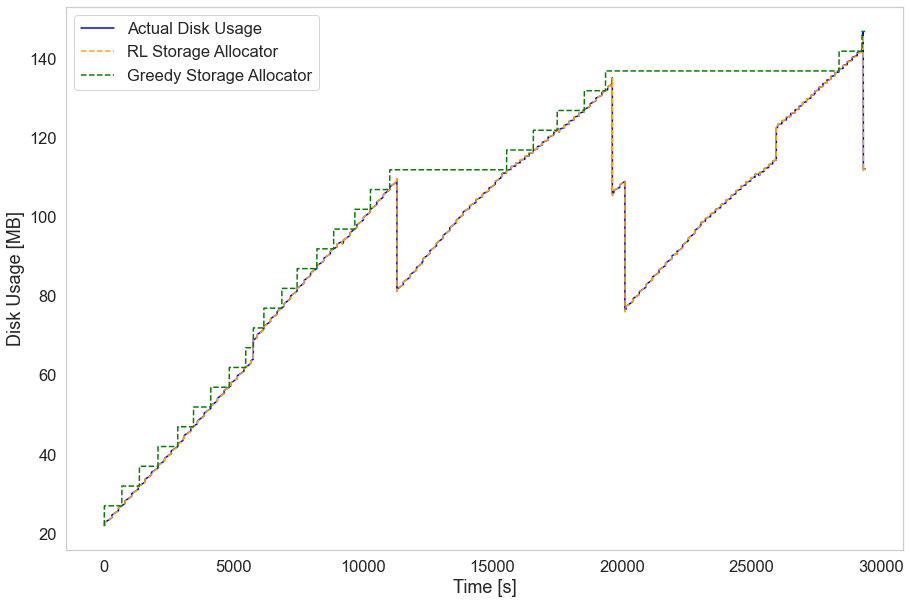

In [44]:
import seaborn as sns
usecol = ["actual_disk_usage", "timeslot", "rl_storage_allocation", "greedy_storage_allocator"]
predicted_usage_data = pandas.read_csv('cassandra_non_linear_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Disk Usage [MB]')
plt.plot(predicted_usage_data['actual_disk_usage'], color='blue')
plt.plot(predicted_usage_data['rl_storage_allocation'], linestyle='--', color='orange')
plt.plot(predicted_usage_data['greedy_storage_allocator'], linestyle='--', color='green')
plt.legend(['Actual Disk Usage', 'RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\cassandra_non_linear\cassandra_non_linear_storage_allocation.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\cassandra_non_linear\cassandra_non_linear_storage_allocation.pdf", dpi = 300)
#plt.plot(predicted_usage_data)
plt.show()

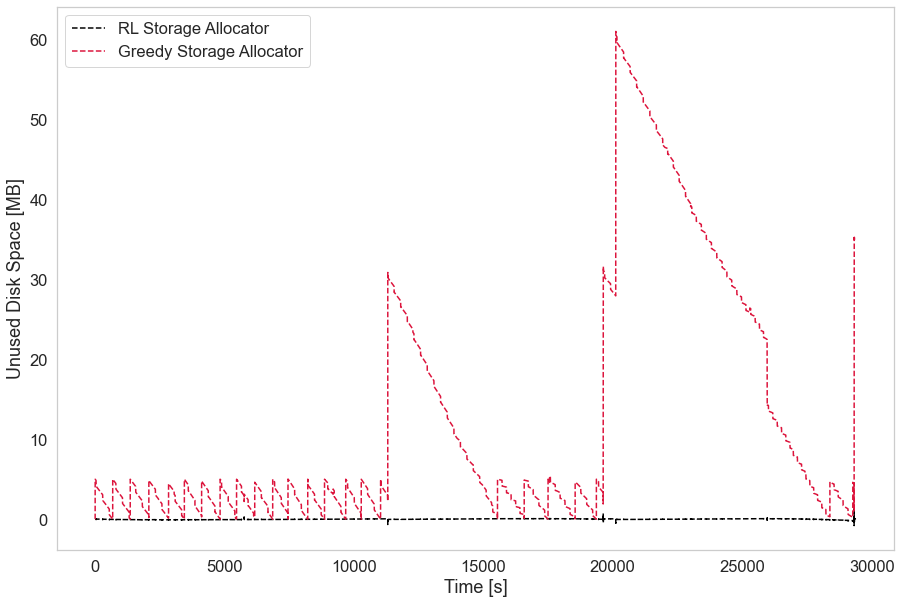

In [45]:
usecol = ["timeslot", "rl_unused_storage", "greedy_unused_storage"]
predicted_usage_data = pandas.read_csv('cassandra_non_linear_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Unused Disk Space [MB]')
plt.plot(predicted_usage_data['rl_unused_storage'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_unused_storage'], linestyle='--', color='crimson')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\cassandra_non_linear\cassandra_non_linear_unused_storage.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\cassandra_non_linear\cassandra_non_linear_unused_storage.pdf", dpi = 300)
#plt.plot(predicted_usage_data)
plt.show()

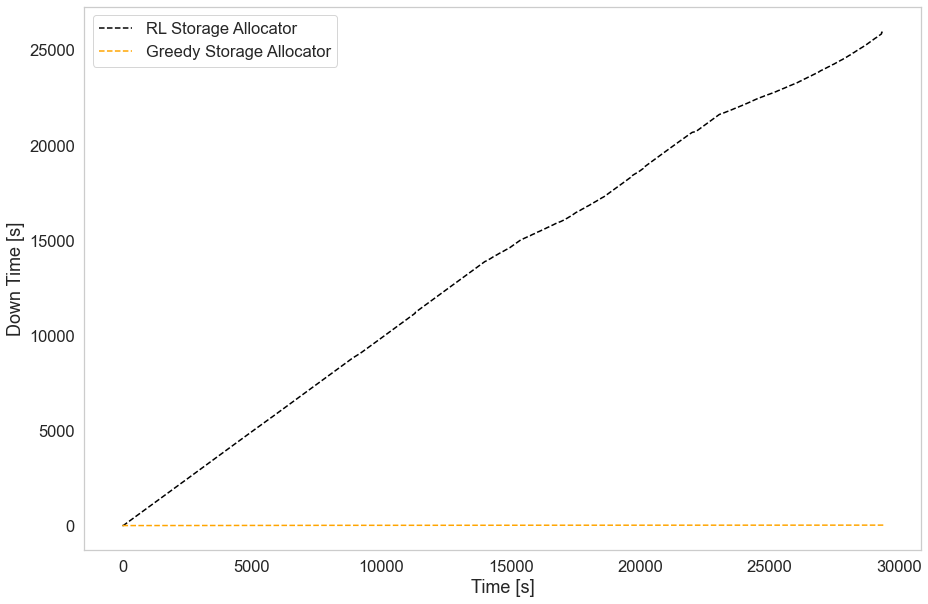

In [46]:
usecol = ["timeslot", "rl_downtime", "greedy_downtime"]
predicted_usage_data = pandas.read_csv('cassandra_non_linear_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Down Time [s]')
plt.plot(predicted_usage_data['rl_downtime'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_downtime'], linestyle='--', color='orange')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\cassandra_non_linear\cassandra_non_linear_downtime.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\cassandra_non_linear\cassandra_non_linear_downtime.pdf", dpi = 300)
#plt.plot(predicted_usage_data)
plt.show()

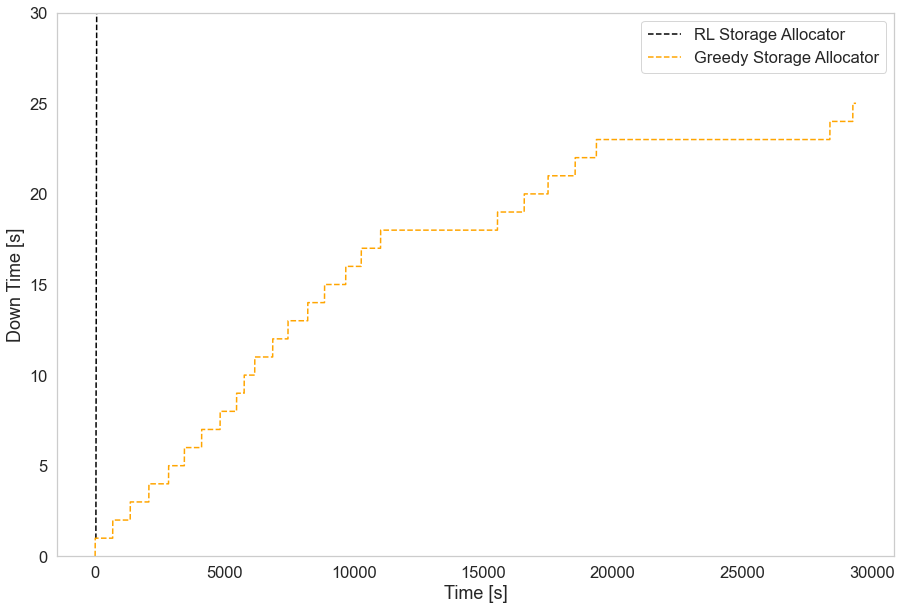

In [47]:
usecol = ["timeslot", "rl_downtime", "greedy_downtime"]
predicted_usage_data = pandas.read_csv('cassandra_non_linear_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Down Time [s]')
plt.plot(predicted_usage_data['rl_downtime'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_downtime'], linestyle='--', color='orange')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper right')
plt.ylim(0,30)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\cassandra_non_linear\cassandra_non_linear_downtime_emph.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\cassandra_non_linear\cassandra_non_linear_downtime_emph.pdf", dpi = 300)
#plt.plot(predicted_usage_data)
plt.show()